In [73]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

# sklearn general
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


# parameter selecters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
train["is_train"] = 1
test["is_train"] = 0
data = pd.concat([train, test])

## Feature Engineering

1. Understand the data - info(), describe()
2. Histograms and Boxplots
3. Value counts
4. Missing data
5. Correlation
6. Exploring themes

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_train
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  is_train     891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_train
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


### Extract the numerical and categorical features into separate datasets

In [7]:
train.describe().columns
df_num = train[["Age", "SibSp", "Parch", "Fare"]]
df_cat = train[["Survived", "Pclass", "Sex", "Ticket", "Cabin", "Embarked"]]

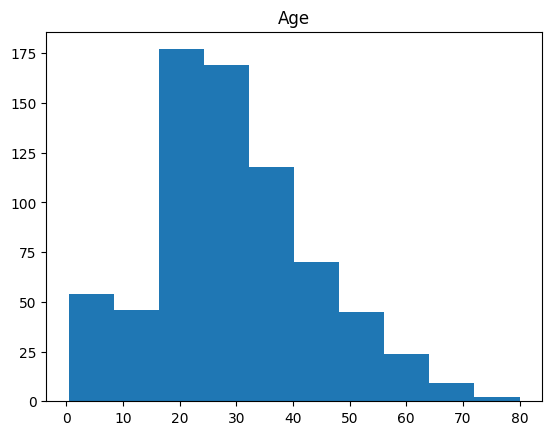

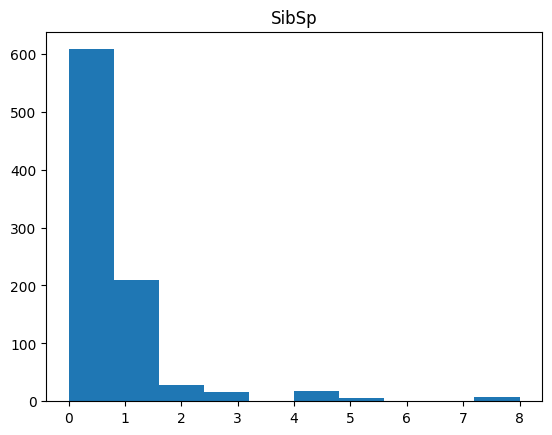

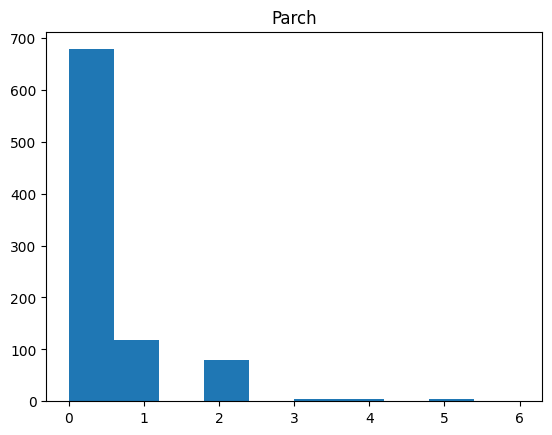

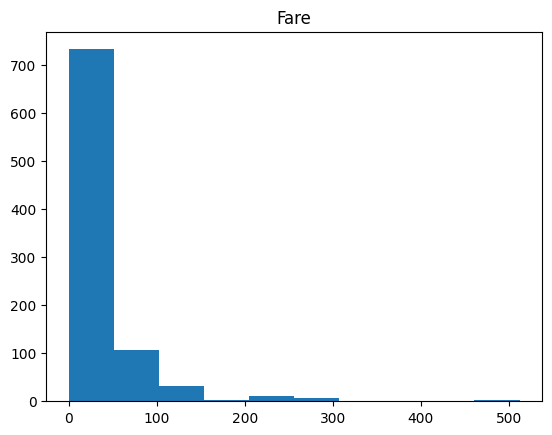

In [8]:
# histograms for numerical data
for col in df_num.columns:
    plt.hist(df_num[col])
    plt.title(col)
    plt.show()

<AxesSubplot: >

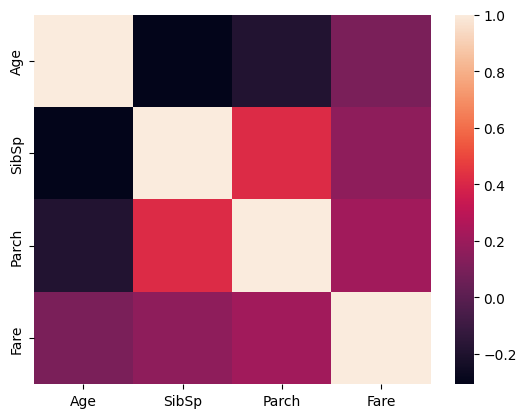

In [9]:
sns.heatmap(df_num.corr())

In [10]:
# pivot table for numerical data
pd.pivot_table(train, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])    

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


0    549
1    342
Name: Survived, dtype: int64


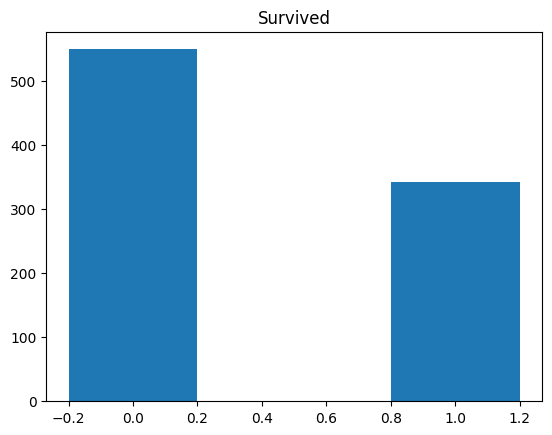

3    491
1    216
2    184
Name: Pclass, dtype: int64


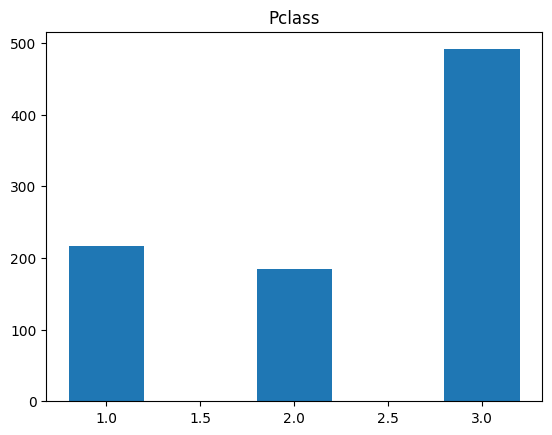

male      577
female    314
Name: Sex, dtype: int64


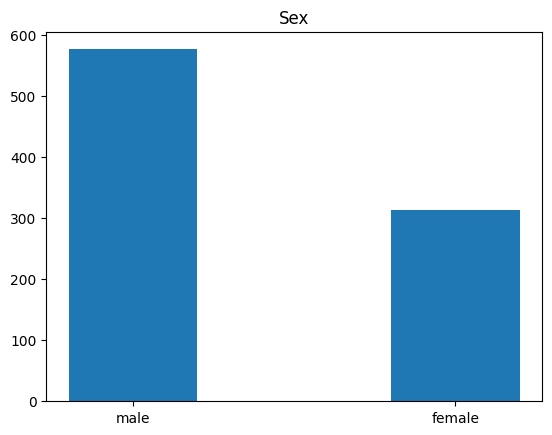

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


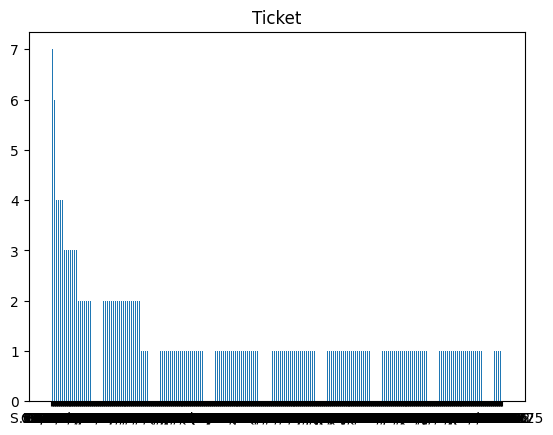

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


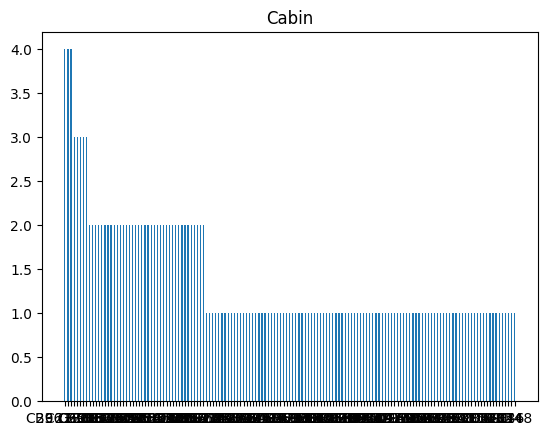

S    644
C    168
Q     77
Name: Embarked, dtype: int64


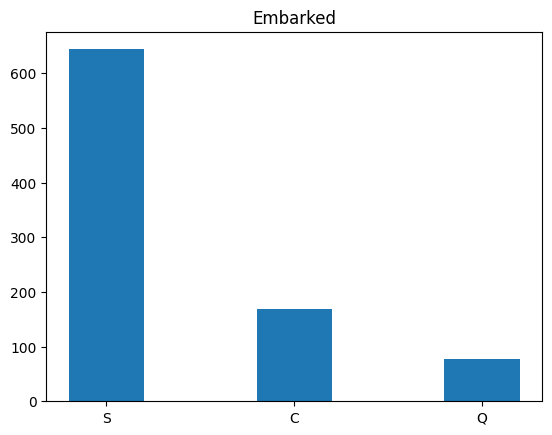

In [67]:
# bar plots for categorical data
for col in df_cat.columns:
    vc = df_cat[col].value_counts()
    print(vc)
    plt.bar(vc.index, vc, width=0.4)
    plt.title(col)
    plt.show()

In [12]:
# pivot table for categorical data
for col in df_cat.columns:
    if col in ["Survived", "Ticket"]:
        continue
    print(pd.pivot_table(train, index="Survived", columns=col, values="Ticket", aggfunc="count"))
    print("--------------------------------------------------------------")

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
--------------------------------------------------------------
Sex       female  male
Survived              
0             81   468
1            233   109
--------------------------------------------------------------
Cabin     A10  A14  A16  A19  A20  A23  A24  A26  A31  A32  ...   E8  F E69  \
Survived                                                    ...               
0         1.0  1.0  NaN  1.0  NaN  NaN  1.0  NaN  NaN  1.0  ...  NaN    NaN   
1         NaN  NaN  1.0  NaN  1.0  1.0  NaN  1.0  1.0  NaN  ...  2.0    1.0   

Cabin     F G63  F G73   F2  F33  F38   F4   G6    T  
Survived                                              
0           1.0    2.0  1.0  NaN  1.0  NaN  2.0  1.0  
1           NaN    NaN  2.0  3.0  NaN  2.0  2.0  NaN  

[2 rows x 147 columns]
--------------------------------------------------------------
Embarked   C   Q    S
Survived             
0         75  47  427


## Cabin data

In [13]:
train["cabin_multiple"] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
train["cabin_multiple"].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [14]:
pd.pivot_table(train, index="Survived", columns="cabin_multiple", values="Ticket", aggfunc="count")

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [15]:
train["cabin_adv"] = train.Cabin.apply(lambda x: str(x)[0])
train["cabin_adv"].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [16]:
pd.pivot_table(train, index="Survived", columns="cabin_adv", values="Name", aggfunc="count")

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


## Titles

In [17]:
train.Name.head
train["name_title"] = train.Name.apply(lambda x: (x.split(",")[1]).split(".")[0].strip())
train.name_title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [18]:
pd.pivot_table(train, index="Survived", columns="name_title", values="Name", aggfunc="count")

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


# Data Preprocessing
1. Drop null values from embarked (only 2)
2. Include only relevant features - since we have only limited data, I wanted to exclude features like Name and Passenger ID so that we could have a reasonable number of features to work with
3.

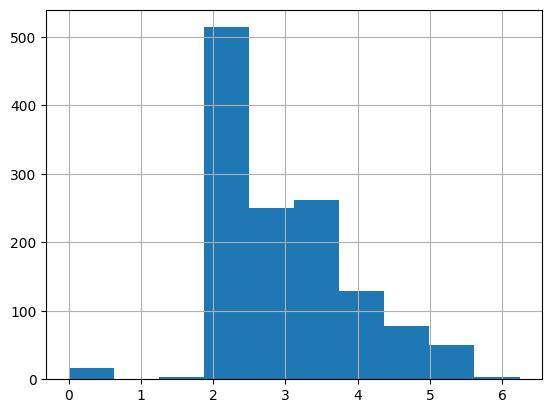

In [19]:
data["cabin_multiple"] = data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
data["cabin_adv"]  = data.Cabin.apply(lambda x: str(x)[0])
data["numeric_ticket"] = data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
data["ticket_letters"] = data.Ticket.apply(lambda x: ''.join(x.split(" ")[:-1]).replace(".", "").replace("/", "").lower() if len(x.split(" ")[:-1]) > 0 else 0)
data["name_title"] = data.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())

# impute nulls for continuous data
data.Age = data.Age.fillna(train.Age.mean())
data.Fare = data.Fare.fillna(train.Fare.mean())

# drop nulls for Embarked (only 2)
data.dropna(subset=["Embarked"], inplace=True)

# log norm of Fare
data["norm_fare"] = np.log(data.Fare + 1)
data["norm_fare"].hist()

# convert Pclass to category for pd.get_dummies()
data.Pclass = data.Pclass.astype(str)

# create dummy variables from categories
dummies = pd.get_dummies(data[["Pclass", "Sex", "Age", "SibSp", "Parch", "norm_fare", "Embarked", "cabin_adv", "cabin_multiple", "numeric_ticket", "name_title", "is_train"]])

# split to train test again
x_train = dummies[dummies.is_train == 1].drop(["is_train"], axis=1)
x_test = dummies[dummies.is_train == 0].drop(["is_train"], axis=1)
y_train = data[data.is_train == 1].Survived

In [20]:
# Scale data
scale = StandardScaler()
dummies_scaled = dummies.copy()
dummies_scaled[["Age", "SibSp", "Parch", "norm_fare"]] = scale.fit_transform(dummies_scaled[["Age", "SibSp", "Parch", "norm_fare"]])

x_train_scaled = dummies_scaled[dummies_scaled.is_train == 1].drop(["is_train"], axis=1)
x_test_scaled = dummies_scaled[dummies_scaled.is_train == 0].drop(["is_train"], axis=1)

# Model Building
1. Naive Bayes
2. Logistic Regression
3. Decision Tree
4. KNN
5. Random Forest
6. Support Vector
7. Xtreme Gradient Boosting
8. Soft Voting

In [21]:
gnb = GaussianNB()
cv = cross_val_score(gnb, x_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.65168539 0.6741573  0.6741573  0.75280899 0.84269663 0.7752809
 0.79775281 0.69662921 0.76404494 0.73863636]
0.736784984678243


In [22]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, x_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.80898876 0.83146067 0.76404494 0.86516854 0.82022472 0.7752809
 0.83146067 0.83146067 0.86516854 0.86363636]
0.8256894790602656


In [23]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, x_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.80898876 0.83146067 0.76404494 0.86516854 0.82022472 0.7752809
 0.83146067 0.83146067 0.86516854 0.86363636]
0.8256894790602656


In [24]:
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, x_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.73033708 0.80898876 0.70786517 0.79775281 0.82022472 0.75280899
 0.79775281 0.78651685 0.82022472 0.81818182]
0.7840653728294178


In [25]:
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, x_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.73033708 0.80898876 0.70786517 0.79775281 0.82022472 0.75280899
 0.79775281 0.78651685 0.80898876 0.80681818]
0.7818054136874362


In [26]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, x_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.71910112 0.84269663 0.78651685 0.82022472 0.84269663 0.7752809
 0.86516854 0.79775281 0.83146067 0.85227273]
0.8133171603677221


In [27]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, x_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.76404494 0.83146067 0.75280899 0.85393258 0.85393258 0.84269663
 0.82022472 0.80898876 0.86516854 0.82954545]
0.8222803881511747


In [28]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, x_train, y_train, cv=10)
print(cv)
print(cv.mean())

[0.7752809  0.82022472 0.74157303 0.83146067 0.85393258 0.86516854
 0.7752809  0.73033708 0.85393258 0.81818182]
0.8065372829417774


In [29]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, x_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.7752809  0.82022472 0.74157303 0.83146067 0.85393258 0.86516854
 0.7752809  0.73033708 0.85393258 0.81818182]
0.8065372829417774


In [30]:
svc = SVC(probability=True)
cv = cross_val_score(svc, x_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.80898876 0.85393258 0.76404494 0.87640449 0.85393258 0.79775281
 0.82022472 0.78651685 0.86516854 0.86363636]
0.8290602655771195


In [31]:
voting_clf = VotingClassifier(estimators=[("lr", lr), ("knn", knn), ("rf", rf), ("gnb", gnb), ("svc", svc)], voting="soft")
cv = cross_val_score(voting_clf, x_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.76404494 0.83146067 0.74157303 0.87640449 0.85393258 0.85393258
 0.82022472 0.78651685 0.87640449 0.84090909]
0.8245403472931564


In [32]:
# performance reporting function
def clf_performance(clf, model_name):
    print("MODEL: ", model_name)
    print("Best Score: ", str(clf.best_score_))
    print("Parameters: ", str(clf.best_params_))

In [63]:
# Logistic Regression
lr = LogisticRegression()
param_grid = {
    "max_iter": [2000],
    "penalty": ["l1", "l2"],
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}
clf_lr = GridSearchCV(lr, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_lr = clf_lr.fit(x_train_scaled, y_train)
clf_performance(best_clf_lr, "Logistic Regression")

Fitting 10 folds for each of 40 candidates, totalling 400 fits
MODEL:  Logistic Regression
Best Score:  0.8268130745658835
Parameters:  {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [64]:
# KNN
knn = KNeighborsClassifier()
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "p": [1, 2]
}
clf_knn = GridSearchCV(knn, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_knn = clf_knn.fit(x_train_scaled, y_train)
clf_performance(best_clf_knn, "KNN")

Fitting 10 folds for each of 48 candidates, totalling 480 fits
MODEL:  KNN
Best Score:  0.8222803881511747
Parameters:  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [65]:
# SVC
svc = SVC(probability=True)
param_grid = tuned_parameters = [
    {
        "kernel": ["rbf"], "gamma": [.1, .5, 1, 2, 5, 10],
        "C": [.1, 10, 100, 1000]
    },
    {"kernel": ["linear"], "C": [.1, 1, 10, 100, 1000]},
    {"kernel": ["poly"], "degree": [2, 3, 4, 5], "C": [.1, 1, 10, 100, 1000]}
]
clf_svc = GridSearchCV(svc, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
best_clf_svc = clf_svc.fit(x_train_scaled, y_train)
clf_performance(best_clf_svc, "SVC")

Fitting 10 folds for each of 49 candidates, totalling 490 fits
MODEL:  SVC
Best Score:  0.8324310520939735
Parameters:  {'C': 1, 'degree': 2, 'kernel': 'poly'}


In [66]:
# Random Forest
rf = RandomForestClassifier(random_state=1)
param_grid = {
    "n_estimators": [100, 500, 1000],
    "bootstrap": [3, 5, 10, 20, 50, 75, 100, None],
    "max_features": ["auto", "sqrt"],
    "min_samples_leaf": [1, 2, 4, 10],
    "min_samples_split": [2, 5, 10]
}
clf_rf = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=10, verbose=True, n_jobs=-1)
best_clf_rf = clf_rf.fit(x_train_scaled, y_train)
clf_performance(best_clf_rf, "Random Forest")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


MODEL:  Random Forest
Best Score:  0.8346527068437182
Parameters:  {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': 3}


## Feature Importance

C:\Users\abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


<AxesSubplot: >

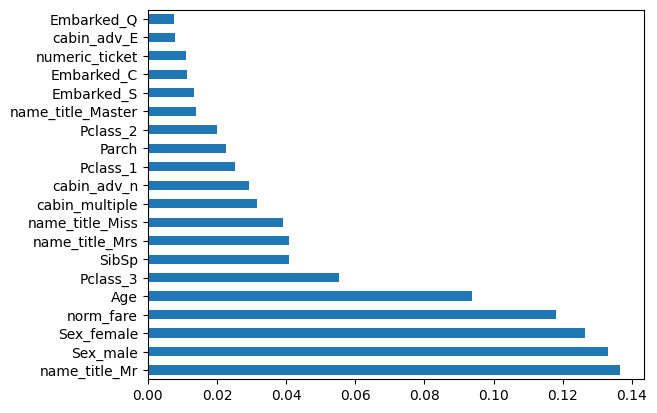

In [68]:
# best features in the Random Forest
best_rf = best_clf_rf.best_estimator_.fit(x_train_scaled, y_train)
feature_importance = pd.Series(best_rf.feature_importances_, index=x_train_scaled.columns)
feature_importance.nlargest(20).plot(kind="barh")

## Ensemble Approaches

In [98]:
# best classifiers
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_

estimators = [
    ("knn", best_knn),
    ("rf", best_rf),
    # ("svc", best_svc),
    ("lr", best_lr)
]

voting_clf_hard = VotingClassifier(estimators=estimators, voting="hard")
voting_clf_soft = VotingClassifier(estimators=estimators, voting="soft")


with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # hard voter
    cvs = cross_val_score(voting_clf_hard, x_train, y_train, cv=10)
    print("Voting Classifier Hard: ", cvs)
    print("Mean: ", cvs.mean())
    print()

    # soft voter
    cvs = cross_val_score(voting_clf_soft, x_train, y_train, cv=10)
    print("Voting Classifier Soft: ", cross_val_score(voting_clf_soft, x_train, y_train, cv=10))
    print("Mean: ", cvs.mean())


Voting Classifier Hard:  [0.79775281 0.86516854 0.76404494 0.88764045 0.86516854 0.83146067
 0.85393258 0.82022472 0.8988764  0.85227273]
Mean:  0.8436542390194075

Voting Classifier Soft:  [0.79775281 0.84269663 0.78651685 0.88764045 0.85393258 0.83146067
 0.85393258 0.83146067 0.88764045 0.86363636]
Mean:  0.8436670071501533


In [108]:
A = 10

l0 = list(set(itertools.permutations([1,1,1])))
l1 = list(set(itertools.permutations([1,0.9,0.6])))
l2 = list(set(itertools.permutations([1,0.9,0.7])))
l3 = list(set(itertools.permutations([1,0.6,0.7])))
lw = list(itertools.chain(l0, l1, l2, l3))

la = []
for it in lw:
    la.append(list(it))
la

[[1, 1, 1],
 [0.9, 0.6, 1],
 [1, 0.9, 0.6],
 [0.6, 1, 0.9],
 [0.9, 1, 0.6],
 [0.6, 0.9, 1],
 [1, 0.6, 0.9],
 [1, 0.7, 0.9],
 [0.7, 1, 0.9],
 [1, 0.9, 0.7],
 [0.9, 1, 0.7],
 [0.7, 0.9, 1],
 [0.9, 0.7, 1],
 [1, 0.6, 0.7],
 [0.6, 0.7, 1],
 [1, 0.7, 0.6],
 [0.7, 1, 0.6],
 [0.7, 0.6, 1],
 [0.6, 1, 0.7]]

In [109]:
params = {"weights": la}
vote_weight = GridSearchCV(voting_clf_soft, param_grid=params, cv=5, verbose=True, n_jobs=-1)
best_clf_weight = vote_weight.fit(x_train, y_train)
clf_performance(best_clf_weight, "VC Weights")
voting_clf_sub = best_clf_weight.best_estimator_.predict(x_test_scaled)

# A=2, 84.25
# A=1.5, 84.25

Fitting 5 folds for each of 19 candidates, totalling 95 fits


C:\Users\abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


MODEL:  VC Weights
Best Score:  0.8403097822636958
Parameters:  {'weights': [1, 1, 1]}


In [111]:
voting_clf_hard.fit(x_train_scaled, y_train)
voting_clf_soft.fit(x_train_scaled, y_train)
best_rf.fit(x_train_scaled, y_train)

predict_hard = voting_clf_hard.predict(x_test_scaled)
predict_soft = voting_clf_soft.predict(x_test_scaled)
predict_rf = best_rf.predict(x_test_scaled)

C:\Users\abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\abhay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\lo

In [123]:
# Output to dataframe
final_1 = {"PassengerId": test.PassengerId, "Survived": predict_rf}
submission1 = pd.DataFrame(data=final_1)
submission1 = submission1.astype("int")

final_2 = {"PassengerId": test.PassengerId, "Survived": predict_hard}
submission2 = pd.DataFrame(data=final_2)
submission2 = submission1.astype("int")

final_3 = {"PassengerId": test.PassengerId, "Survived": predict_soft}
submission3 = pd.DataFrame(data=final_3)
submission3 = submission1.astype("int")

In [118]:
# Dataframe to CSV
submission1.to_csv("submission_rf.csv", index=False)
submission2.to_csv("submission_hardv.csv", index=False)
submission3.to_csv("submission_soft.csv", index=False)